In [1]:
%matplotlib inline

from collections import OrderedDict
from pathlib import Path

import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import pyLDAvis
from pyLDAvis.sklearn import prepare

from wordcloud import WordCloud
from termcolor import colored

# sklearn for feature extraction & modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
import joblib
import re

# Gensim
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'said','rsquo','euro','&#39;','...','..','39',"'s",
 '....',
 '10',
 '15',
 '20',
 '30','acirc',"n't",'n/a']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style('white')
plt.rcParams['figure.figsize'] = (14.0, 8.7)

In [4]:
pyLDAvis.enable_notebook()

In [5]:
data_ov = pd.read_csv(r'Neutral_data.csv')

In [6]:
data_ov.head()

,REVIEW_ID,MEMBER_ID,Reviews,sentiment_label
0,a2p3g000000LAe2AAG,0011U00000riuzfQAA,NaN,Neutral
1,a2p3g000000LAenAAG,0011U00000rieIYQAY,NaN,Neutral
2,a2p1U000000l8FEQAY,0011U00000rjZH9QAM,answer all my questions,Neutral
3,a2p1U000000RvKnQAK,0011U00000rjGseQAE,NaN,Neutral
4,a2p3g000000pnkRAAQ,0011U00000rijxIQAQ,NaN,Neutral


In [9]:
data_ov_1 = data_ov.dropna()

In [10]:
data_ov_1.isnull().sum()

REVIEW_ID          0
MEMBER_ID          0
Reviews            0
sentiment_label    0
dtype: int64

In [12]:
data_ov_1.shape

(2827, 4)

### Neutral comments 

In [14]:
docs = data_ov_1
docs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2827 entries, 2 to 10737
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   REVIEW_ID        2827 non-null   object
 1   MEMBER_ID        2827 non-null   object
 2   Reviews          2827 non-null   object
 3   sentiment_label  2827 non-null   object
dtypes: object(4)
memory usage: 110.4+ KB


## training model

In [15]:
X_train, X_hold = train_test_split(docs, test_size=0.2, random_state=111)

In [16]:
X_train.head()

,REVIEW_ID,MEMBER_ID,Reviews,sentiment_label
2673,a2p3g000000oeVnAAI,0011U00000rjNAzQAM,listened and gave me several options to follow for my situation,Neutral
6303,a2p4w000001q0tcAAA,0011U0000125JZAQA2,the doctor was very attentive to my needs and took the time to discuss my medical history with me,Neutral
10584,a2p4w000002OHuZAAW,0014w00003GEWJMAA5,answered all of my questions went above an beyond to get me the medicine i needed to recover from my sinus infection,Neutral
2486,a2p3g000000Kyv7AAC,0011U00000rhqDDQAY,the doctor was very informative when i asked questions about my health and treatments,Neutral
3597,a2p1U000000RqCAQA0,0011U00000rip02QAA,doctor called me at the appointed time and evaluated my concerns nothing,Neutral


In [17]:
X_train['Reviews'] = X_train['Reviews'].astype(str)

In [18]:
from nltk.stem import WordNetLemmatizer
import nltk
lemma = WordNetLemmatizer()

In [19]:
def tokenize(text):
   tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 1) ] 
   lem = [lemma.lemmatize(item) for item in tokens]
   return tokens

In [20]:
vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, stop_words=stop_words, max_df=0.50, min_df=2, max_features=5000, use_idf=False, norm='l2',ngram_range=(1,3))
tf_vectors = vectorizer_tf.fit_transform(X_train.Reviews)

In [21]:
tf_vectors.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
vectorizer_tf.get_feature_names()

['able',
 'able answer',
 'able answer questions',
 'able appointment',
 'able appointment day',
 'able day',
 'able help',
 'able right',
 'able right away',
 'able schedule',
 'able scheduled',
 'able seen',
 'aboutcan',
 'aboutcan think',
 'aboutcan think thing',
 'abovenothing',
 'access',
 'accommodated',
 'accommodating',
 'according',
 'accordingly',
 'account',
 'action',
 'action plan',
 'actually',
 'actually listened',
 'acupuncture',
 'add',
 'additional',
 'address',
 'address concerns',
 'address health',
 'address questions',
 'addressed',
 'addressed concern',
 'addressed concerns',
 'addressed concernsnothing',
 'addressed health',
 'addressed health concerns',
 'addressed medical',
 'addressed needs',
 'addressed questions',
 'addressing',
 'addressing health',
 'adjusted',
 'advice',
 'advicenothing',
 'advise',
 'advised',
 'ahead',
 'ailments',
 'allergies',
 'allergy',
 'allnone',
 'allnothing',
 'allowed',
 'allowed time',
 'alot',
 'alternatives',
 'amabilidad',

In [23]:
from sklearn import decomposition
lda = decomposition.LatentDirichletAllocation()

W1 = lda.fit_transform(tf_vectors)
H1 = lda.components_

In [24]:
-(np.log(lda.perplexity(tf_vectors)))

-8.311084217497486

In [25]:
print("Log Likelihood: ", lda.score(tf_vectors))

Log Likelihood:  -39903.79543785675


In [26]:
print("Perplexity: ", lda.perplexity(tf_vectors))

Perplexity:  4068.7219726773756


In [27]:
from sklearn.model_selection import GridSearchCV
# Define Search Param
search_params = {'n_components': [5,6,7,8], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(tf_vectors)

GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 6, 7, 8]})

In [28]:
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.9, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=5, n_jobs=1, 
             topic_word_prior=None, total_samples=1000000.0, verbose=0), n_jobs=1,
       param_grid={'n_topics': [5,8,10], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(error_score='raise',
             estimator=LatentDirichletAllocation(learning_decay=0.9,
                                                 learning_method=None,
                                                 n_components=5, n_jobs=1),
             n_jobs=1,
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_topics': [5, 8, 10]},
             return_train_score='warn')

In [29]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tf_vectors))

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 5}
Best Log Likelihood Score:  -10010.439194230803
Model Perplexity:  2220.3867377521033


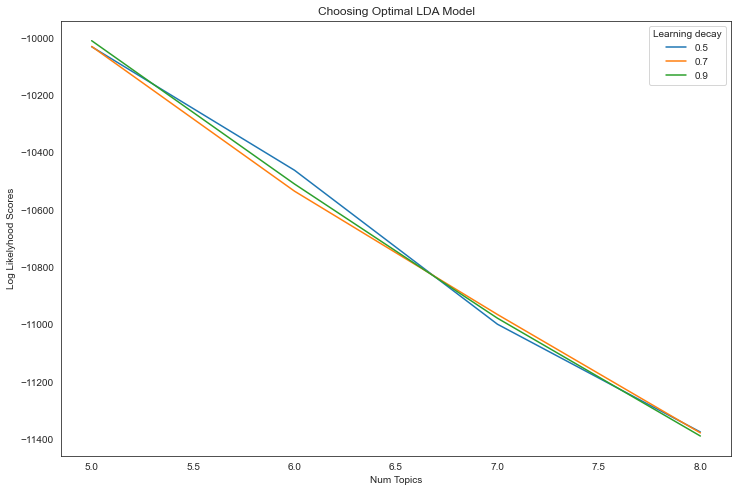

In [30]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [5,6,7,8]
log_likelyhoods_5 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.5]
log_likelyhoods_7 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.7]
log_likelyhoods_9 = [round(model.cv_results_['mean_test_score'][index]) for index, gscore in enumerate(model.cv_results_['params']) if gscore['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [31]:
n_topics = 5

In [32]:
# Create Document - Topic Matrix
lda_output = best_lda_model.transform(tf_vectors)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(X_train['Reviews']))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.060000,0.060000,0.060000,0.570000,0.260000,3
Doc1,0.040000,0.040000,0.040000,0.040000,0.840000,4
Doc2,0.050000,0.050000,0.050000,0.300000,0.550000,4
Doc3,0.060000,0.330000,0.050000,0.050000,0.500000,4
Doc4,0.060000,0.510000,0.060000,0.300000,0.060000,1
Doc5,0.060000,0.140000,0.680000,0.060000,0.060000,2
Doc6,0.070000,0.700000,0.070000,0.070000,0.080000,1
Doc7,0.070000,0.070000,0.070000,0.710000,0.070000,3
Doc8,0.060000,0.060000,0.060000,0.230000,0.600000,4
Doc9,0.100000,0.600000,0.100000,0.100000,0.100000,1


In [33]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,4,597
1,0,519
2,1,489
3,3,452
4,2,204


In [34]:
num_words=10

vocab = np.array(vectorizer_tf.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [35]:
topics

['answered questions answered questions allnothing convenient called questionsnothing discussed appointment answered questionsnothing',
 'listen blood yearly draw physical blood draw quickly shot medical testing',
 'professional dr informative appointment personal asked staff health treatment listened',
 'quick explained concerns listening addressed addressed concerns medical visit service issue',
 'feel rushed thing appointment didn feel rushed patient questions clinic new',
 'phone got answer questions appt answer questions concerns questions concerns muy dr',
 'listened concerns listened concerns doctor communication follow thorough dr addressed exam',
 'time took took time listen spent concerns time listen questions health took time listen',
 'physical check annual prompt right appointment needed doctor able got',
 'blood attentive test work blood work covid attention explain na covid test']

In [36]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, tf_vectors, vectorizer_tf, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  25.905041
1       51.163364 -159.968018       2        1  22.561570
3      -73.144554   21.523815       3        1  20.608789
0      -66.410133 -110.606438       4        1  19.109899
2       54.417324   12.443444       5        1  11.814700, topic_info=                             Term        Freq       Total Category  logprob  \
819                      listened  106.000000  106.000000  Default  30.0000   
803                        listen   40.000000   40.000000  Default  29.0000   
284                      concerns   61.000000   61.000000  Default  28.0000   
1515                         time  108.000000  108.000000  Default  27.0000   
1613                         took   55.000000   55.000000  Default  26.0000   
1621                    took time   47.000000   47.000000  Default  25.0000   
78                       answered   37.000000   37.000000  Default  24.0000   
1075                     physical   29.000000   29.000000  Default  23.0000   
82             answered questions   26.000000   26.000000  Default  22.0000   
1170                    questions   65.000000   65.000000  Default  21.0000   
1722                         work   20.000000   20.000000  Default  20.0000   
246                         check   23.000000   23.000000  Default  19.0000   
210                         blood   27.000000   27.000000  Default  18.0000   
33                      addressed   16.000000   16.000000  Default  17.0000   
829             listened concerns   16.000000   16.000000  Default  16.0000   
1563                  time listen   17.000000   17.000000  Default  15.0000   
1495                     thorough   27.000000   27.000000  Default  14.0000   
100                   appointment   34.000000   34.000000  Default  13.0000   
1474                         test   14.000000   14.000000  Default  12.0000   
1146                       prompt   15.000000   15.000000  Default  11.0000   
1138                 professional   20.000000   20.000000  Default  10.0000   
326                         covid   12.000000   12.000000  Default   9.0000   
217                    blood work   11.000000   11.000000  Default   8.0000   
1096                       polite   10.000000   10.000000  Default   7.0000   
654                           got   17.000000   17.000000  Default   6.0000   
733                   informative   12.000000   12.000000  Default   5.0000   
1634             took time listen   11.000000   11.000000  Default   4.0000   
1706                         went   16.000000   16.000000  Default   3.0000   
280                       concern    7.000000    7.000000  Default   2.0000   
862                     listening   13.000000   13.000000  Default   1.0000   
1543                 time explain    7.486055    8.074846   Topic1  -5.1129   
1628            took time explain    6.163036    6.752085   Topic1  -5.3073   
54                     allnothing    6.029665    6.617328   Topic1  -5.3292   
861               listenednothing    4.711282    5.298935   Topic1  -5.5759   
1479                      testing    4.422058    5.011861   Topic1  -5.6393   
905                        manner    3.963677    4.552137   Topic1  -5.7487   
1138                 professional   17.625614   20.315024   Topic1  -4.2566   
1444                        takes    3.677752    4.284732   Topic1  -5.8236   
840                 listened gave    3.605252    4.202089   Topic1  -5.8435   
1597                timely manner    3.318014    3.906532   Topic1  -5.9265   
1445                   takes time    3.414380    4.024744   Topic1  -5.8979   
965                            na    6.954637    8.242720   Topic1  -5.1865   
968                          nana    3.088284    3.675953   Topic1  -5.9983   
94                        answers    4.341864    5.170170   Topic1  -5.6576

In [37]:
W1 = best_lda_model.fit_transform(tf_vectors)
H1 = best_lda_model.components_

In [38]:
colnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_train.Reviews))]
df_doc_topic = pd.DataFrame(np.round(W1, 3), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic

In [39]:
X_train.head()

,REVIEW_ID,MEMBER_ID,Reviews,sentiment_label
2673,a2p3g000000oeVnAAI,0011U00000rjNAzQAM,listened and gave me several options to follow for my situation,Neutral
6303,a2p4w000001q0tcAAA,0011U0000125JZAQA2,the doctor was very attentive to my needs and took the time to discuss my medical history with me,Neutral
10584,a2p4w000002OHuZAAW,0014w00003GEWJMAA5,answered all of my questions went above an beyond to get me the medicine i needed to recover from my sinus infection,Neutral
2486,a2p3g000000Kyv7AAC,0011U00000rhqDDQAY,the doctor was very informative when i asked questions about my health and treatments,Neutral
3597,a2p1U000000RqCAQA0,0011U00000rip02QAA,doctor called me at the appointed time and evaluated my concerns nothing,Neutral


In [40]:
df_doc_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.055,0.055,0.055,0.055,0.780,4
Doc1,0.283,0.041,0.598,0.039,0.039,2
Doc2,0.050,0.051,0.051,0.797,0.051,3
Doc3,0.264,0.050,0.051,0.051,0.584,4
Doc4,0.063,0.062,0.063,0.748,0.063,3
Doc5,0.151,0.190,0.058,0.058,0.542,4
Doc6,0.076,0.073,0.074,0.701,0.076,3
Doc7,0.073,0.702,0.074,0.075,0.076,1
Doc8,0.058,0.057,0.057,0.770,0.059,3
Doc9,0.100,0.100,0.596,0.102,0.101,2


In [41]:
df_doc_topic['dominant_topic'].value_counts()

4    560
2    456
0    442
3    433
1    370
Name: dominant_topic, dtype: int64

## Testing model

In [42]:
WHold = best_lda_model.transform(vectorizer_tf.transform(X_hold.Reviews))

In [43]:
colnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_hold.Reviews))]
df_doc_topic = pd.DataFrame(np.round(WHold, 2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_doc_topic.values, axis=1)
df_doc_topic['dominant_topic'] = significant_topic


In [44]:
df_doc_topic['dominant_topic'].value_counts()

4    163
0    120
3    119
2     97
1     67
Name: dominant_topic, dtype: int64

In [45]:
df_doc_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.04,0.04,0.82,0.04,0.05,2
Doc1,0.07,0.07,0.07,0.07,0.73,4
Doc2,0.19,0.05,0.59,0.13,0.05,2
Doc3,0.07,0.07,0.07,0.07,0.73,4
Doc4,0.47,0.06,0.34,0.07,0.06,0
Doc5,0.05,0.10,0.04,0.27,0.55,4
Doc6,0.06,0.75,0.06,0.06,0.06,1
Doc7,0.33,0.06,0.06,0.33,0.21,0
Doc8,0.07,0.06,0.29,0.06,0.52,4
Doc9,0.23,0.06,0.06,0.06,0.58,4


In [46]:
joblib.dump(best_lda_model,'lda_sklearn_topic_modelling_neutral.pkl')

['lda_sklearn_topic_modelling_neutral.pkl']

In [47]:
import joblib
lda_base = joblib.load('lda_sklearn_topic_modelling_neutral.pkl') 
lda_base

LatentDirichletAllocation(learning_decay=0.9, n_components=5)

In [52]:
vectorizer_tf_out = TfidfVectorizer(tokenizer=tokenize, stop_words=stop_words, max_df=0.50, min_df=2, max_features=1738, use_idf=False, norm='l2',ngram_range=(1,3))
tf_vectors_out = vectorizer_tf_out.fit_transform(docs.Reviews)

In [53]:
opt_eval_2 = pd.DataFrame(data=lda_base.transform(tf_vectors_out),
                              index=docs.Reviews)
assignments_2 = docs.assign(predicted=opt_eval_2.idxmax(axis=1).values)
assignments_2

,REVIEW_ID,MEMBER_ID,Reviews,sentiment_label,predicted
2,a2p1U000000l8FEQAY,0011U00000rjZH9QAM,answer all my questions,Neutral,3
5,a2p3g000000pg9nAAA,0011U00000t40KuQAI,scheduling diagnosis and recommendationsnone,Neutral,1
6,a2p1U000000RvD9QAK,0011U00000rhvnGQAQ,thorough,Neutral,2
7,a2p1U000000RoRHQA0,0011U00000ri4oyQAA,informative,Neutral,1
10,a2p1U000000RvYfQAK,0011U00000ri6NyQAI,dr lee called me early and we were quickly able to determine what was needed for our phone consultation dr lee wasn t initially aware of why she was calling me needed her to fill out a form for blood donations regarding my health,Neutral,2
19,a2p1U000000RqA1QAK,0011U00000riwBbQAI,listened,Neutral,4
21,a2p1U000000RpwIQAS,0011U00000ri5EDQAY,answered all of my questionsnothing,Neutral,2
24,a2p3g000000pLyVAAU,0011U00000rjHHEQA2,consult with doctor and lab tests,Neutral,0
25,a2p3g000000KyuoAAC,0011U00000rja0jQAA,explained situation that i have showed online options to assist me with exercises na,Neutral,1
31,a2p3g000000ozCGAAY,0011U00000sgxpUQAQ,conversation,Neutral,0


In [54]:
assignments_2.shape

(2827, 5)

In [55]:
data_ov['Topic_Neutral'] = assignments_2.predicted

In [56]:
data_ov.head()

,REVIEW_ID,MEMBER_ID,Reviews,sentiment_label,Topic_Neutral
0,a2p3g000000LAe2AAG,0011U00000riuzfQAA,NaN,Neutral,NaN
1,a2p3g000000LAenAAG,0011U00000rieIYQAY,NaN,Neutral,NaN
2,a2p1U000000l8FEQAY,0011U00000rjZH9QAM,answer all my questions,Neutral,3.0
3,a2p1U000000RvKnQAK,0011U00000rjGseQAE,NaN,Neutral,NaN
4,a2p3g000000pnkRAAQ,0011U00000rijxIQAQ,NaN,Neutral,NaN


In [57]:
data_ov['Topic_Neutral'].value_counts()

4.0    721
2.0    638
3.0    514
0.0    507
1.0    447
Name: Topic_Neutral, dtype: int64

In [64]:
data_ov['Topic_Neutral'].unique()

array([nan,  3.,  1.,  2.,  4.,  0.])

In [58]:
data_ov.to_csv('data_Neutral_topics.csv',index = False)

In [59]:
vectorizer_tf_out.get_feature_names()

['able',
 'able answer',
 'able answer questions',
 'able appointment',
 'able appointment day',
 'able day',
 'able determine',
 'able draw',
 'able draw blood',
 'able extremely',
 'able help',
 'able right',
 'able right away',
 'able schedule',
 'able scheduled',
 'able seen',
 'aboutcan',
 'aboutcan think',
 'aboutcan think thing',
 'abovenothing',
 'access',
 'accommodated',
 'accommodating',
 'according',
 'accordingly',
 'account',
 'accurate',
 'action',
 'action plan',
 'actually',
 'actually listened',
 'acupuncture',
 'add',
 'additional',
 'address',
 'address concerns',
 'address health',
 'address questions',
 'addressed',
 'addressed concern',
 'addressed concerns',
 'addressed concernsnothing',
 'addressed health',
 'addressed health concerns',
 'addressed medical',
 'addressed needs',
 'addressed questions',
 'addressing',
 'addressing concerns',
 'addressing health',
 'adjusted',
 'administered',
 'advice',
 'advicenothing',
 'advise',
 'advised',
 'ahead',
 'ailment

In [60]:
num_words=10

vocab = np.array(vectorizer_tf_out.get_feature_names())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [61]:
data_ov.shape

(10739, 5)

In [62]:
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(best_lda_model, tf_vectors, vectorizer_tf, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  24.267119
2       51.163364 -159.968018       2        1  21.651393
3      -73.144554   21.523815       3        1  20.288163
1      -66.410133 -110.606438       4        1  17.736168
0       54.417324   12.443444       5        1  16.057157, topic_info=                             Term        Freq       Total Category  logprob  \
819                      listened  106.000000  106.000000  Default  30.0000   
803                        listen   40.000000   40.000000  Default  29.0000   
1613                         took   55.000000   55.000000  Default  28.0000   
1515                         time  109.000000  109.000000  Default  27.0000   
210                         blood   27.000000   27.000000  Default  26.0000   
1621                    took time   47.000000   47.000000  Default  25.0000   
78                       answered   37.000000   37.000000  Default  24.0000   
82             answered questions   26.000000   26.000000  Default  23.0000   
174                     attentive   24.000000   24.000000  Default  22.0000   
1170                    questions   65.000000   65.000000  Default  21.0000   
1138                 professional   20.000000   20.000000  Default  20.0000   
1495                     thorough   26.000000   26.000000  Default  19.0000   
1199                        quick   18.000000   18.000000  Default  18.0000   
1075                     physical   29.000000   29.000000  Default  17.0000   
1722                         work   20.000000   20.000000  Default  16.0000   
1563                  time listen   17.000000   17.000000  Default  15.0000   
246                         check   22.000000   22.000000  Default  14.0000   
1146                       prompt   14.000000   14.000000  Default  13.0000   
1410                        staff   20.000000   20.000000  Default  12.0000   
733                   informative   12.000000   12.000000  Default  11.0000   
912                       medical   21.000000   21.000000  Default  10.0000   
829             listened concerns   16.000000   16.000000  Default   9.0000   
217                    blood work   11.000000   11.000000  Default   8.0000   
1634             took time listen   11.000000   11.000000  Default   7.0000   
1268                      results   13.000000   13.000000  Default   6.0000   
66                         annual   11.000000   11.000000  Default   5.0000   
548                       explain   13.000000   13.000000  Default   4.0000   
71                         answer   11.000000   11.000000  Default   3.0000   
33                      addressed   16.000000   16.000000  Default   2.0000   
271                 communication   10.000000   10.000000  Default   1.0000   
819                      listened  105.567884  106.170485   Topic1  -2.4012   
829             listened concerns   15.898965   16.489379   Topic1  -4.2943   
149               asked questions    5.405796    5.999645   Topic1  -5.3731   
888                           lot    5.241938    5.832948   Topic1  -5.4039   
287            concerns addressed    4.030850    4.621077   Topic1  -5.6666   
693               health concerns    3.786210    4.382938   Topic1  -5.7292   
854             listened symptoms    3.732239    4.321244   Topic1  -5.7436   
840                 listened gave    3.588681    4.178870   Topic1  -5.7828   
890                      lot time    3.269422    3.861260   Topic1  -5.8760   
1217                       really    8.472673   10.083781   Topic1  -4.9237   
1570                time listened    2.739163    3.329519   Topic1  -6.0529   
1219              really listened    2.715876    3.306603   Topic1  -6.0615   
1440                     symptoms    8.190290   10.005787   Topic1  -4.9576   
1468                      talking    2.607937    3.198629   Topic1  -6.1020

In [63]:
topics

['asked questions gave time answers taking time explaining questions answered history addressed dave did thorough exam skin drawing blood removed',
 'attentive professional providers regarding health willing medical needs blood test results attentivenothing sets went blood additional',
 'time don took time explained took time needed physical quickly got did thorough exam employees amabilidad ample time wait half',
 'left message quickly got time don annual physical exam answer question check blood work time really took time explained took time needed treatments',
 'listen concerns addressed check blood work time don handled listened answered questions answered questionsna swabbed did thorough exam quickly got dave']

In [ ]:
'glad went time answer appointment day big doctor did didn feel vitals virtual good job',
 'time answer questions answered took took time answered let know coming fault explain new doctor',
 'car services courteous friendly process just got right examination dr bernardy staff amazing patients',
 'forward everside health staff amazing caring professional process helped efficient doctor did staff friendly helpful thorough caring',
 'got right dr bernardy life condition really appreciated appointment day doctor did allowed did fault']
